In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def read_df(rental_file):
    '''
    Reads a car rental CSV from Kaggle

    Inputs:
        CSV file with location, vehicle make, model, and daily rate information

    Returns:
        df(DataFrame): DataFrame containing the full CSV file
    '''
    
    # CSV to read into a DF
    df = pd.read_csv(rental_file)
    return df

In [4]:
df = read_df("CarRentalDataV1.csv")
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019,Albuquerque
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018,Albuquerque
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012,Albuquerque
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018,Albuquerque
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010,Albuquerque


In [5]:
def clean_and_sort_df(df):
    '''
    Sorts and cleans the CSV we just read into a DF

    Inputs:
        DataFrame of Car Rental Data

    Returns:
        df_ATL(DataFrame): DataFrame containing only vehciles rented in the Atlanta market. Also cleans up the naming conventions of the columns we
        need to interact with such as vehicle.type and vehicle.year
    '''
    df_ATL = df[df.airportcity == 'Atlanta']
    df_ATL = df_ATL.rename(columns = {'location.city': 'city', 'location.country' : 'country', 'location.latitude' : 'latitude',  'vehicle.make' : 'make', 'vehicle.model' : 'model', 'vehicle.type' : 'type', 'vehicle.year' : 'year', 'rate.daily' : 'daily_rate'})
    return df_ATL

In [13]:
df_ATL = clean_and_sort_df(df)
df_ATL.sort_values('daily_rate', ascending=False)

,fuelType,rating,renterTripsTaken,reviewCount,city,country,latitude,location.longitude,location.state,owner.id,daily_rate,make,model,type,year,airportcity
222,ELECTRIC,5.00,4,2,McDonough,US,33.504183,-84.169019,GA,7934891,800,Tesla,Model X,suv,2019,Atlanta
179,HYBRID,5.00,6,2,Atlanta,US,33.937641,-84.376130,GA,12800611,600,BMW,i8,car,2016,Atlanta
137,GASOLINE,5.00,27,24,Mableton,US,33.805410,-84.526445,GA,217743,386,Jaguar,F-TYPE,car,2014,Atlanta
108,GASOLINE,4.91,53,45,Atlanta,US,33.776537,-84.359708,GA,464263,385,Bentley,Continental GT,car,2005,Atlanta
153,ELECTRIC,NaN,0,0,Mableton,US,33.813345,-84.529672,GA,217743,350,Tesla,Model X,suv,2017,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,GASOLINE,4.92,37,36,Atlanta,US,33.647454,-84.453073,GA,8444510,32,Ford,Fiesta,car,2017,Atlanta
135,GASOLINE,4.86,30,28,Atlanta,US,33.647684,-84.453383,GA,8444510,32,Nissan,Versa,car,2017,Atlanta
75,GASOLINE,4.84,71,58,East Point,US,33.652323,-84.491513,GA,7697843,29,smart,fortwo,car,2015,Atlanta
151,NaN,NaN,0,0,Atlanta,US,33.595022,-84.422693,GA,14917535,28,Kia,Rio,car,2020,Atlanta


In [7]:
def sort_lux_df():
    '''
    Sorts the new Atlanta focused DF to only show vehicles considered luxury based on daily rate

    Inputs:
        Atlanta DataFrame

    Returns:
        df_ATL_lux(DataFrame): DataFrame containing only the luxury vehciles for rent in Atlanta
    '''
    df_ATL_lux = df_ATL[df_ATL.daily_rate > 150]
    return df_ATL_lux


In [17]:
df_ATL_lux = sort_lux_df()
df_ATL_lux['model'].value_counts()


Model 3              6
Model X              4
S-Class              3
Corvette             3
Ghibli               3
Cayenne              2
Panamera             2
i8                   2
M4                   2
Range Rover          2
Model S              2
F-TYPE               2
E-Class              1
Slingshot            1
Range Rover Velar    1
Levante              1
Suburban             1
AMG GT               1
Continental GT       1
7 Series             1
Boxster              1
RS 7                 1
Corvette Stingray    1
A8                   1
Name: model, dtype: int64

[]

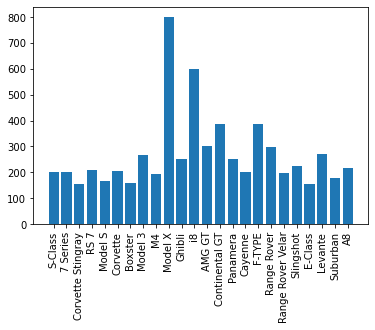

In [18]:
plt.bar(x=df_ATL_lux['model'], height =df_ATL_lux['daily_rate'])
plt.xticks(rotation=90)
plt.plot()